In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid", color_codes=True)

In [46]:
col_names = ['age', 'workclass', 'fnlwgt', 'education',
            'education-num', 'marital-status', 'occupation',
            'relationship', 'race', 'sex', 'capital-gain',
            'capital-loss', 'hours-per-week', 'native-country',
            'income'
            ]
df = pd.read_csv('data/adult.data', header=None, names=col_names)
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [48]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [49]:
cat_vars = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country', 'income']
num_vars = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

df_categorial = df[cat_vars]
df_numerical = df[num_vars]

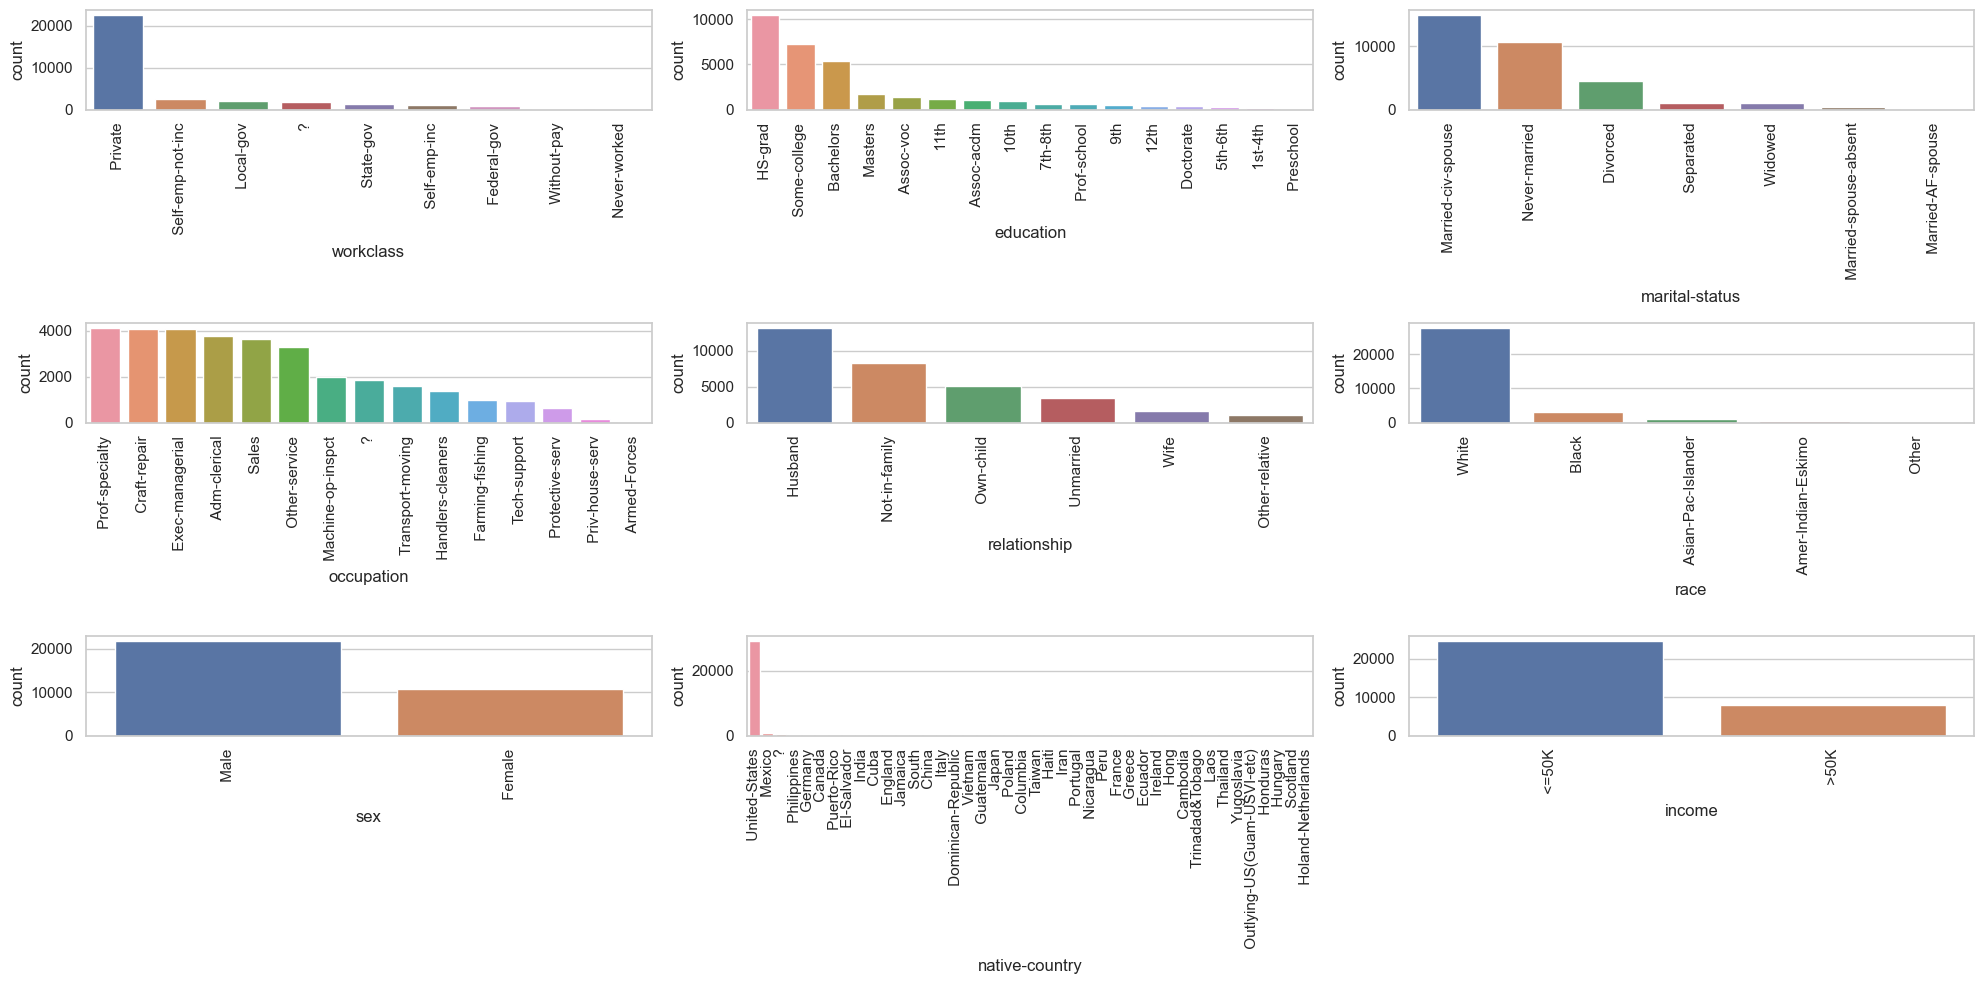

In [50]:
fig, ax = plt.subplots(3, 3, figsize=(20, 10))
axs = ax.flatten()

for i, var in enumerate(cat_vars):
    sns.countplot(x=var, data=df_categorial, ax=axs[i], order=df_categorial[var].value_counts().index)
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)
    axs[i].set_xlabel(var)

fig.tight_layout()

plt.show()

/var/folders/43/5lj7tsms4q1dq44ykfhnkplm0000gn/T/ipykernel_79688/482783700.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)
/var/folders/43/5lj7tsms4q1dq44ykfhnkplm0000gn/T/ipykernel_79688/482783700.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)
/var/folders/43/5lj7tsms4q1dq44ykfhnkplm0000gn/T/ipykernel_79688/482783700.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)
/var/folders/43/5lj7tsms4q1dq44ykfhnkplm0000gn/T/ipykernel_79688/482783700.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)
/var/folders/43/5lj7tsms4q1dq44ykfhnkplm0000gn/T/ipykernel_79688/482783700.py:6: UserWarning: FixedFormatter should only

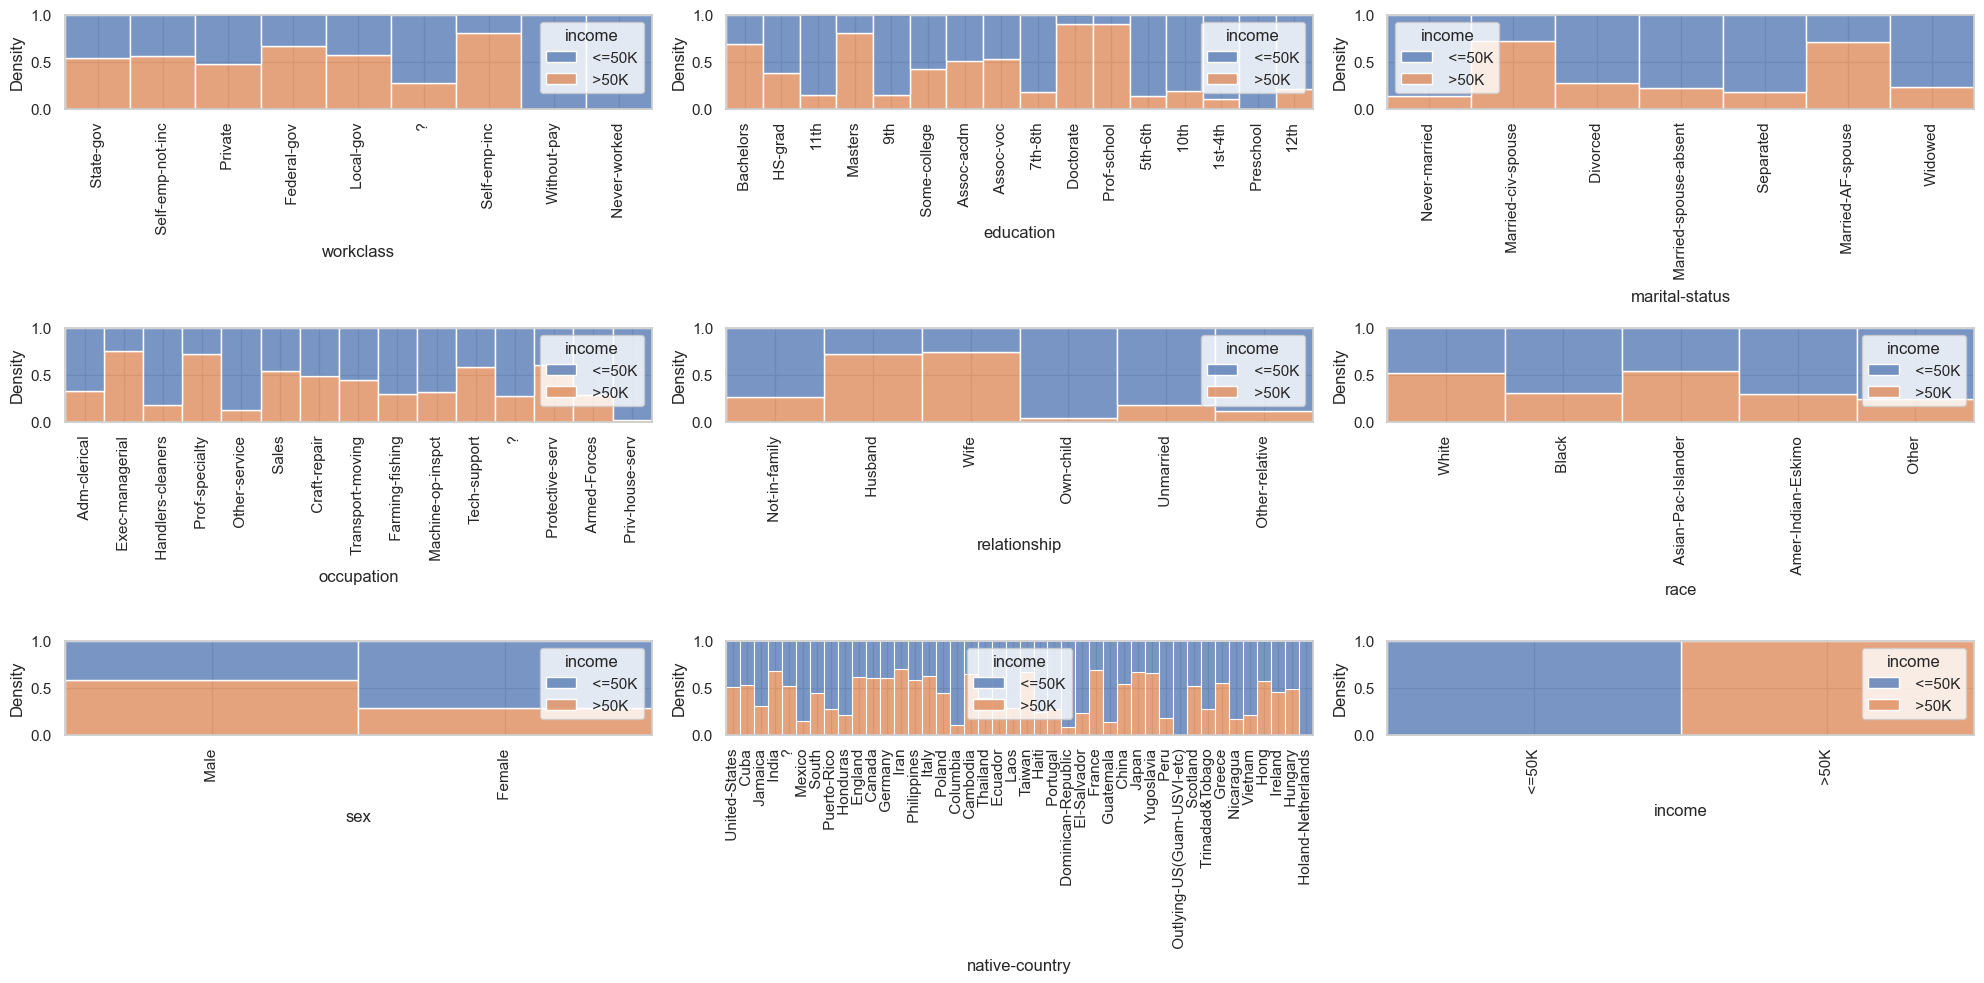

In [51]:
fig, ax = plt.subplots(3, 3, figsize=(20, 10))
axs = ax.flatten()

for i, var in enumerate(cat_vars):
    sns.histplot(x=var, hue="income", data=df, ax=axs[i], multiple="fill", kde=False, element="bars" , fill=True, stat="density", common_norm=False, common_bins=False, discrete=(var in cat_vars))
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)
    axs[i].set_xlabel(var)

fig.tight_layout()

plt.show()

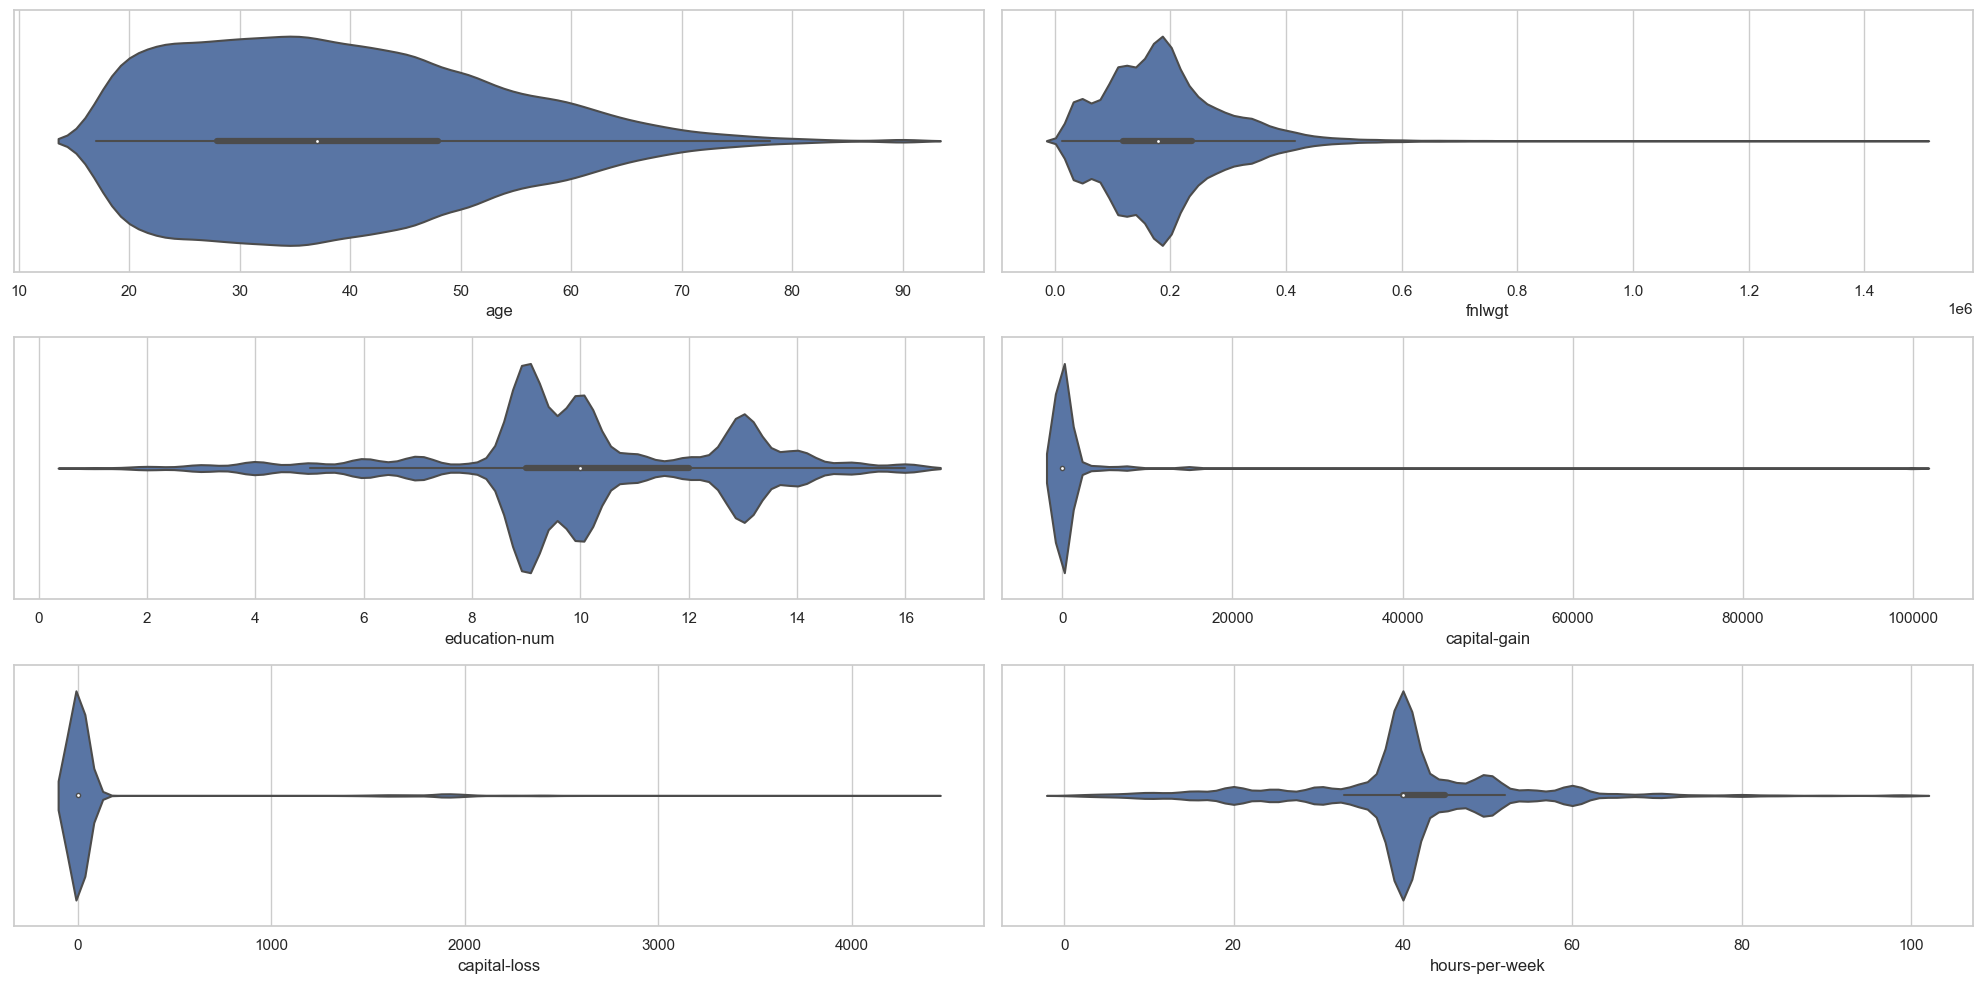

In [52]:
fig, ax = plt.subplots(3, 2, figsize=(20, 10))
axs = ax.flatten()

for i, var in enumerate(num_vars):
    sns.violinplot(x=var, data=df_numerical, ax=axs[i])

fig.tight_layout()

plt.show()

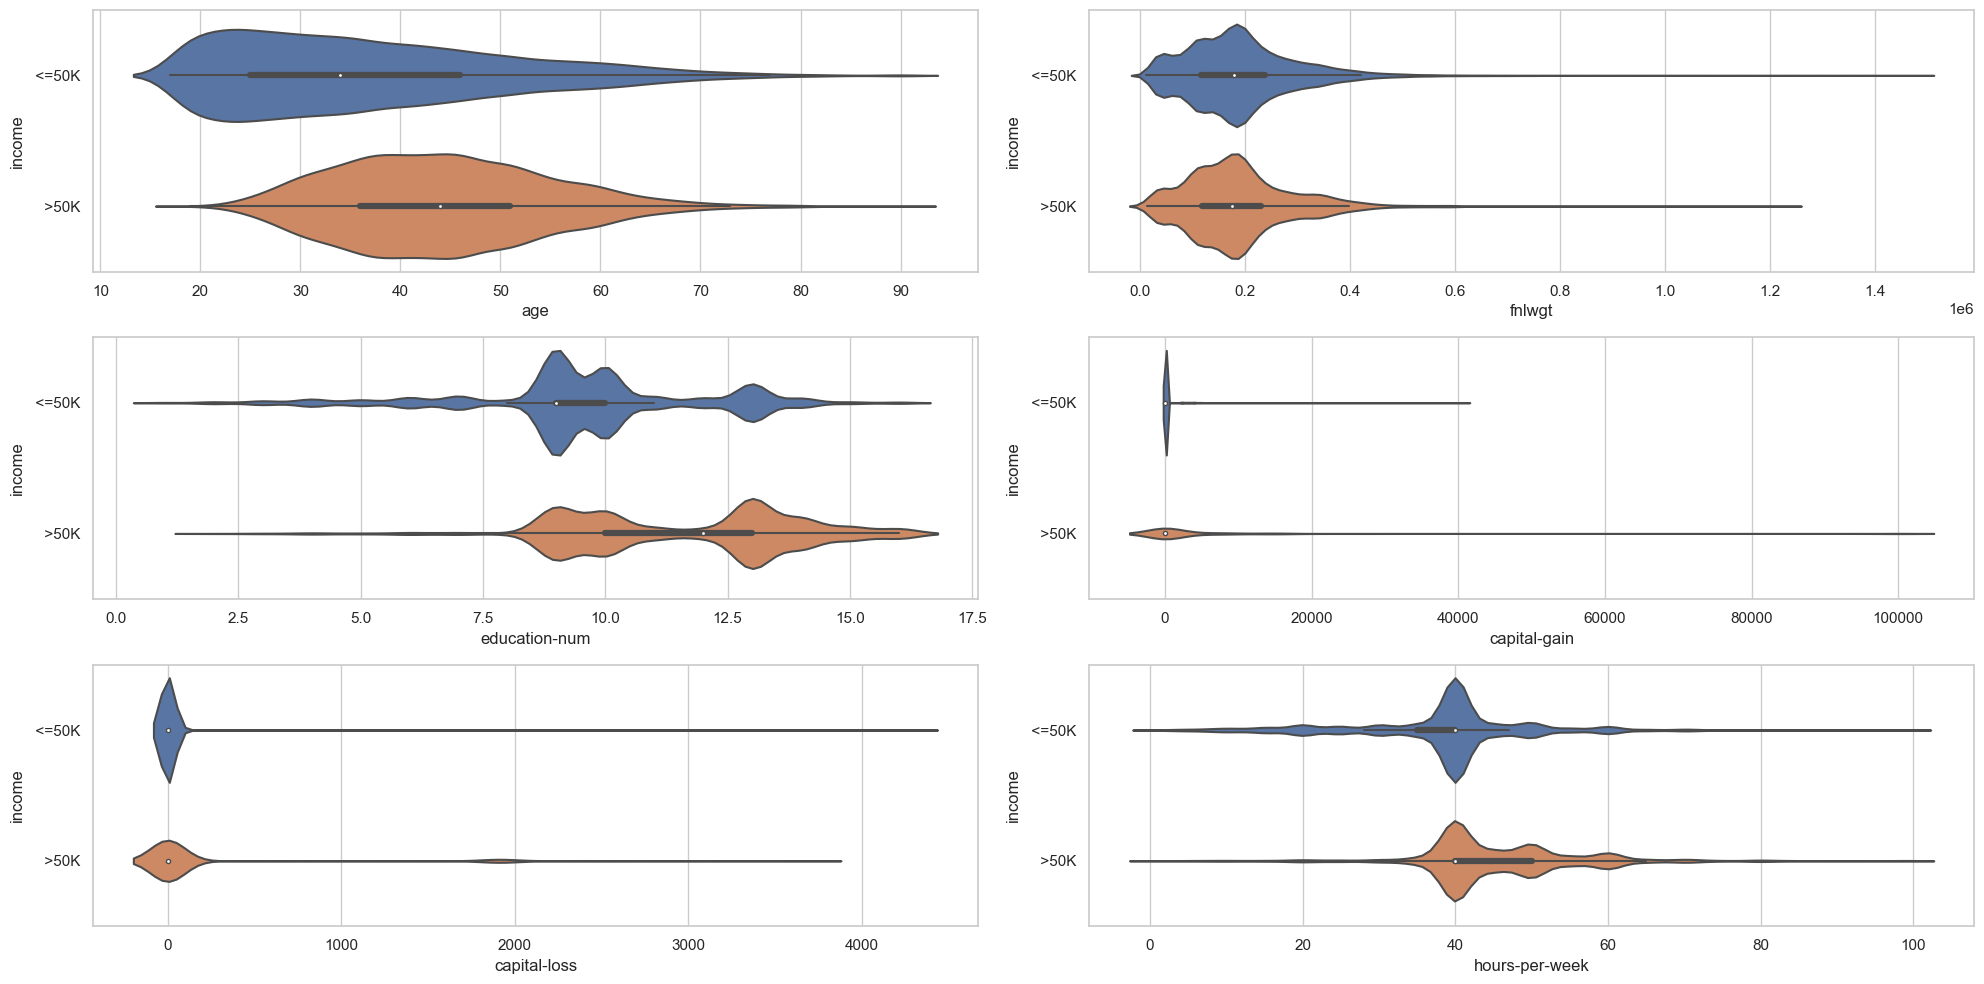

In [53]:
fig, ax = plt.subplots(3, 2, figsize=(20, 10))
axs = ax.flatten()

for i, var in enumerate(num_vars):
    sns.violinplot(x=var, y='income', data=df, ax=axs[i])

fig.tight_layout()

plt.show()

In [54]:
# sns.pairplot(df, hue='income', vars=num_vars)

# Data Preprocessing

In [55]:
for col in df.select_dtypes (include=['object']).columns:
    print(col, df[col].unique(), '\t', len(df[col].unique()))

workclass [' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked'] 	 9
education [' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th'] 	 16
marital-status [' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed'] 	 7
occupation [' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-fishing' ' Machine-op-inspct' ' Tech-support' ' ?'
 ' Protective-serv' ' Armed-Forces' ' Priv-house-serv'] 	 15
relationship [' Not-in-family' ' Husband' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative'] 	 6
race [' White' ' Black' ' Asian-Pac-Islander' ' Amer-Indian-Eskimo' ' Other'] 	 5
sex [' Male' ' Female'] 	 2
native-country [' United-States'

In [56]:
# Label encoding

from sklearn.preprocessing import LabelEncoder

# Loop over each column in the DataFrame where dtype is 'object'
for col in df.select_dtypes(include=['object']).columns:
    # Initialize a LabelEncoder object
    label_encoder = LabelEncoder()
    # Fit the encoder to the unique values in the column
    label_encoder.fit(df[col].unique())
    # Transform the column using the encoder
    df[col] = label_encoder.transform(df[col])
    # Print the column name and the unique encoded values
    print (f" {col}: {df[col]. unique()}")



 workclass: [7 6 4 1 2 0 5 8 3]
 education: [ 9 11  1 12  6 15  7  8  5 10 14  4  0  3 13  2]
 marital-status: [4 2 0 3 5 1 6]
 occupation: [ 1  4  6 10  8 12  3 14  5  7 13  0 11  2  9]
 relationship: [1 0 5 3 4 2]
 race: [4 2 1 0 3]
 sex: [1 0]
 native-country: [39  5 23 19  0 26 35 33 16  9  2 11 20 30 22 31  4  1 37  7 25 36 14 32
  6  8 10 13  3 24 41 29 28 34 38 12 27 40 17 21 18 15]
 income: [0 1]


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             32561 non-null  int64
 1   workclass       32561 non-null  int64
 2   fnlwgt          32561 non-null  int64
 3   education       32561 non-null  int64
 4   education-num   32561 non-null  int64
 5   marital-status  32561 non-null  int64
 6   occupation      32561 non-null  int64
 7   relationship    32561 non-null  int64
 8   race            32561 non-null  int64
 9   sex             32561 non-null  int64
 10  capital-gain    32561 non-null  int64
 11  capital-loss    32561 non-null  int64
 12  hours-per-week  32561 non-null  int64
 13  native-country  32561 non-null  int64
 14  income          32561 non-null  int64
dtypes: int64(15)
memory usage: 3.7 MB


# Train models

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

X = df.drop('income', axis=1)
y = df['income']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)





              precision    recall  f1-score   support

           0       0.88      0.88      0.88      4927
           1       0.63      0.64      0.63      1586

    accuracy                           0.82      6513
   macro avg       0.76      0.76      0.76      6513
weighted avg       0.82      0.82      0.82      6513



### Decision Trees

In [64]:
# Grid search to find best hyperparameters

from sklearn.model_selection import GridSearchCV

# Define the grid of hyperparameters 'params_dt'
params_dt = {
    'max_depth': [3, 4, 5, 6],
    'min_samples_leaf': [0.04, 0.06, 0.08],
    'max_features': [0.2, 0.4, 0.6, 0.8]
}

# Instantiate a 10-fold CV grid search object 'grid_dt'
grid_dt = GridSearchCV(estimator=DecisionTreeClassifier(random_state=123),
                          param_grid=params_dt,
                            scoring='accuracy',
                            cv=10,
)

# Fit 'grid_dt' to the training data
grid_dt.fit(X_train, y_train)

# Extract best hyperparameters from 'grid_dt'
best_hyperparams = grid_dt.best_params_

print('Best hyperparameters:\n', best_hyperparams)


Best hyperparameters:
 {'max_depth': 6, 'max_features': 0.2, 'min_samples_leaf': 0.04}


In [69]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


dt = DecisionTreeClassifier(random_state=123
                            , max_depth=best_hyperparams['max_depth']
                            , min_samples_leaf=best_hyperparams['min_samples_leaf']
                            , max_features=best_hyperparams['max_features']
                        )
dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)


accuracy_score(y_test, y_pred)

print(f'Accuracy Score = {accuracy_score(y_test, y_pred) * 100:.2f}%')


Accuracy Score = 82.90%


### Random Forest

In [71]:
# Random Forest implementation

from sklearn.ensemble import RandomForestClassifier

params_dt = {
    'n_estimators': [100, 300, 500],
    'max_depth': [3, 4, 5, 6],
    'max_features': [0.2, 0.4, 0.6, 0.8]
}

# Instantiate a 10-fold CV grid search object 'grid_dt'
grid_dt = GridSearchCV(estimator=RandomForestClassifier(random_state=123),
                            param_grid=params_dt,
                            scoring='accuracy',
                            cv=10,
)

# Fit 'grid_dt' to the training data
grid_dt.fit(X_train, y_train)

# Extract best hyperparameters from 'grid_dt'
best_hyperparams = grid_dt.best_params_

print('Best hyperparameters:\n', best_hyperparams)

KeyboardInterrupt: 

In [72]:

rf = RandomForestClassifier(random_state=123,
                            n_estimators=100,
                            max_depth=4,
                            max_features=0.2
)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)


accuracy_score(y_test, y_pred)

print(f'Accuracy Score = {accuracy_score(y_test, y_pred) * 100:.2f}%')

Accuracy Score = 83.19%
